In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('coople_data.csv')

28.903313388182358


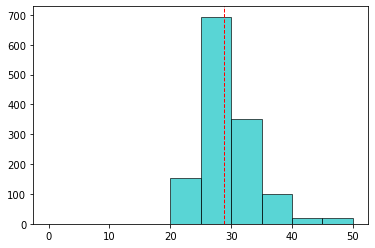

In [2]:
# Hourly salary histogram
pay_per_hour = df["Pay per hour"]

plt.hist(pay_per_hour, color = 'c', edgecolor='black',alpha=0.65)
plt.axvline(pay_per_hour.mean(), color='r', linestyle='dashed', linewidth=1)
print(pay_per_hour.mean())

2887.979222139111


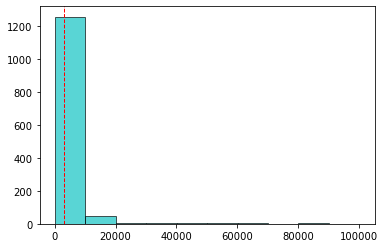

In [3]:
# Total salary histogram
pay_per_hour = df["Pay total"]

plt.hist(pay_per_hour, color = 'c', edgecolor='black',alpha=0.65)
plt.axvline(pay_per_hour.mean(), color='r', linestyle='dashed', linewidth=1)
print(pay_per_hour.mean())

In [4]:
# Industry and frequency
d = {}
for i in df["Industry"]:
    if i not in d.keys():
        d[i] = 1
    else:
        d[i] += 1
d.pop(np.nan)
print(d)

{'Gastronomie / Hotel': 725, 'Promotion / Event': 234, 'Detailhandel / Logistik': 223, 'Luftverkehr': 7, 'Gesundheitswesen': 98, 'Kaufmännische Berufe': 25, 'Handwerk': 4}


In [5]:
# Industry category
industry_cat = d.keys()
industry_cat

dict_keys(['Gastronomie / Hotel', 'Promotion / Event', 'Detailhandel / Logistik', 'Luftverkehr', 'Gesundheitswesen', 'Kaufmännische Berufe', 'Handwerk'])

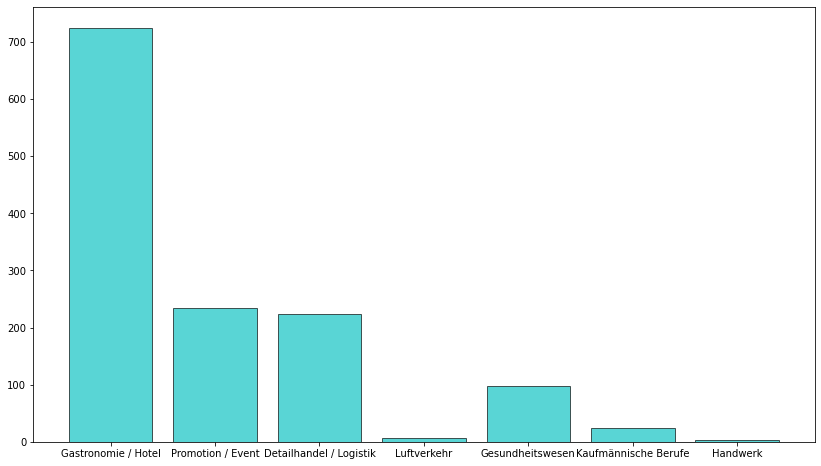

In [6]:
# Industry bar plot
names = list(d.keys())
values = list(d.values())

fig = plt.figure(1, [14, 8])
plt.bar(range(len(d)), values, tick_label=names, edgecolor='black', color = 'c', alpha=0.65)
plt.show()

In [7]:
# Histogram with industry and salary, return mean
def plot_hist_industry(industry,salary): 
    l = []
    for index, row in df.iterrows():
        if row['Industry'] == industry:
            l.append(row[salary])
            
    mean = sum(l)/len(l)
    plt.hist(l, bins=10, color = 'c', edgecolor='black',alpha=0.65)
    plt.xlabel(salary)
    plt.ylabel('Frequency')
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
    plt.text(mean*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(mean))
    plt.title(industry)
    plt.show()

    return l

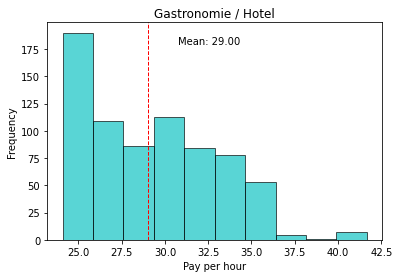

In [8]:
# Hotel hourly salary histogram
hotel = plot_hist_industry('Gastronomie / Hotel','Pay per hour')

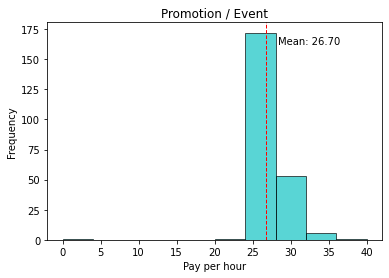

In [9]:
promotion = plot_hist_industry('Promotion / Event','Pay per hour')

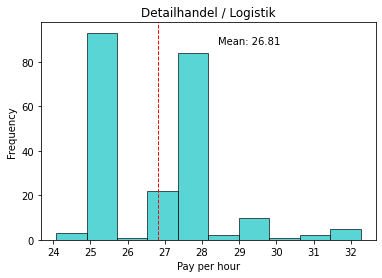

In [10]:
logistik = plot_hist_industry('Detailhandel / Logistik','Pay per hour')

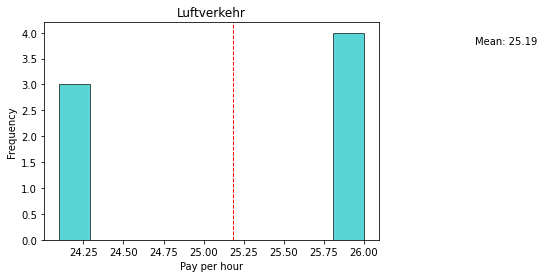

In [11]:
luftverkehr = plot_hist_industry('Luftverkehr','Pay per hour')

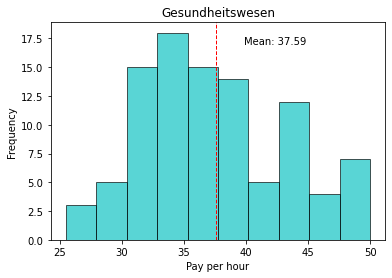

In [12]:
Gesundheitswesen = plot_hist_industry('Gesundheitswesen','Pay per hour')

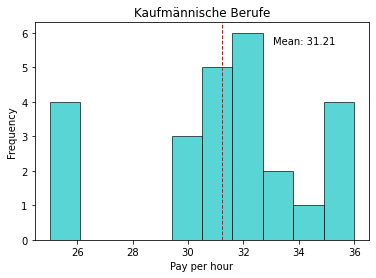

In [13]:
berufe = plot_hist_industry('Kaufmännische Berufe','Pay per hour')

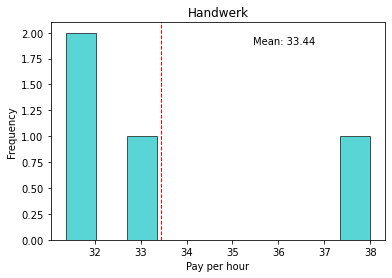

In [14]:
handwerk = plot_hist_industry('Handwerk','Pay per hour')

In [15]:
# Hourly salary VS total salary
def hour_total_hist(industry):
    l1, l2 = [],[]
    for index, row in df.iterrows():
        if row['Industry'] == industry:
            l1.append(row['Pay per hour'])
            l2.append(row['Pay total'])
            
    fig = plt.figure(2, [14, 5])
    plt.subplot(1, 2, 1)
    mean1 = sum(l1)/len(l1)
    plt.hist(l1, bins=10, color = 'c', edgecolor='black',alpha=0.65)
    plt.xlabel('Pay per hour')
    plt.ylabel('Frequency')
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(mean1, color='r', linestyle='dashed', linewidth=1)
    plt.text(mean1*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(mean1))

    plt.subplot(1, 2, 2)
    mean2 = sum(l2)/len(l2)
    plt.hist(l2, bins=10, color = 'c', edgecolor='black',alpha=0.65)
    plt.xlabel('Pay total')
    plt.ylabel('Frequency')
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(mean2, color='r', linestyle='dashed', linewidth=1)
    plt.text(mean2*1.06, max_ylim*0.9, 'Mean: {:.2f}'.format(mean2))
    
    plt.suptitle(industry)
    plt.show()

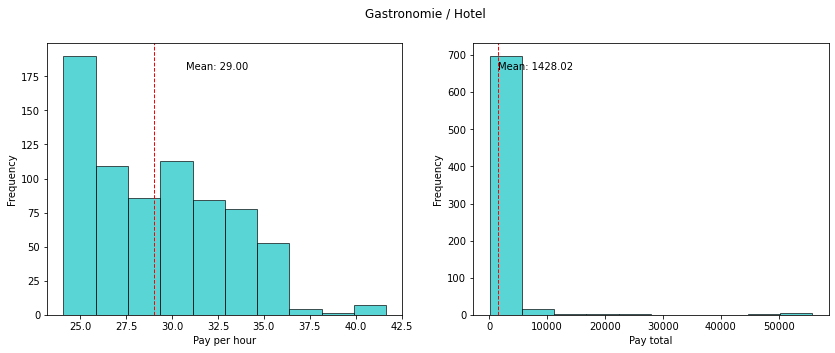

In [16]:
hour_total_hist('Gastronomie / Hotel')

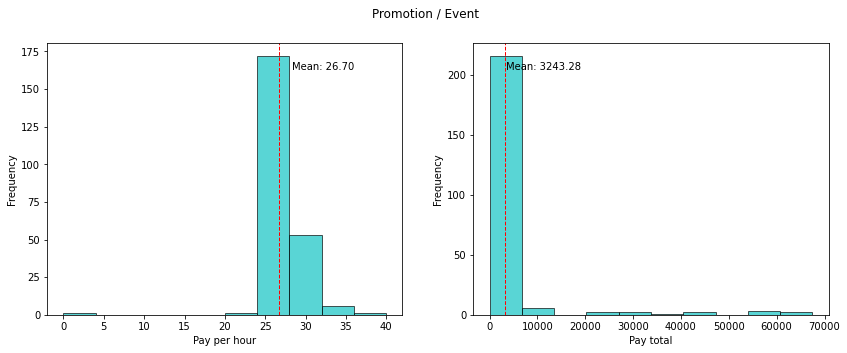

In [17]:
hour_total_hist('Promotion / Event')

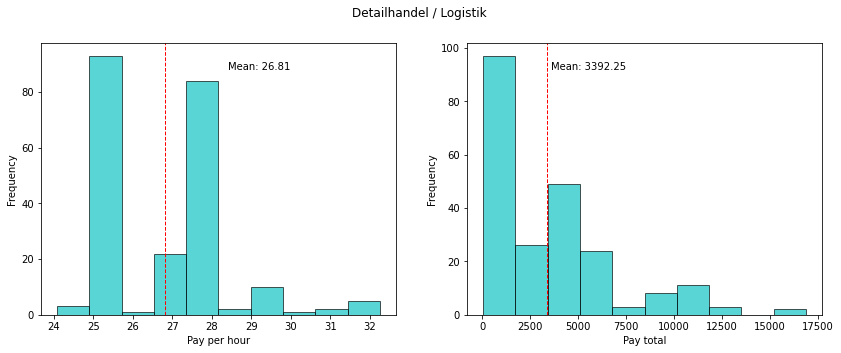

In [18]:
hour_total_hist('Detailhandel / Logistik')

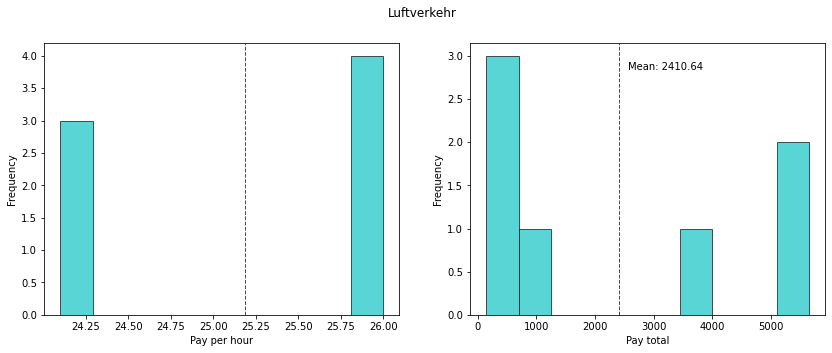

In [19]:
hour_total_hist('Luftverkehr')

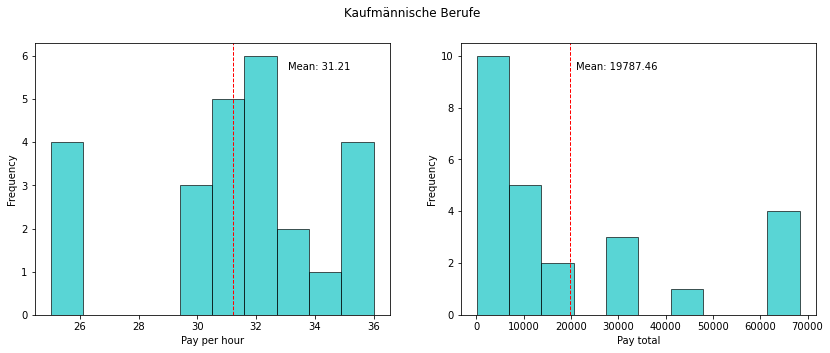

In [20]:
hour_total_hist('Kaufmännische Berufe')

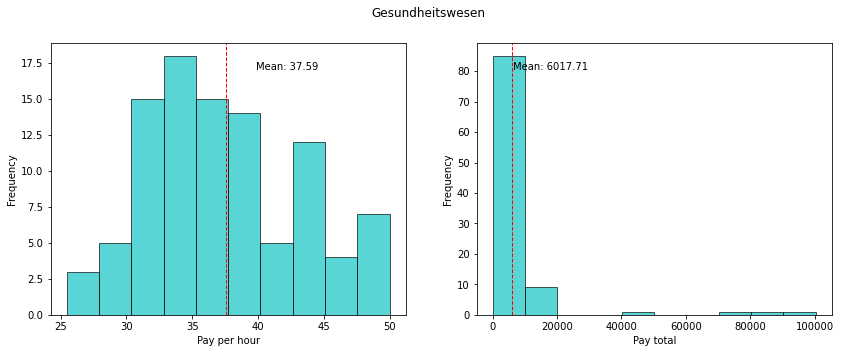

In [21]:
hour_total_hist('Gesundheitswesen')

<AxesSubplot:title={'center':'Pay per hour'}, xlabel='Industry'>

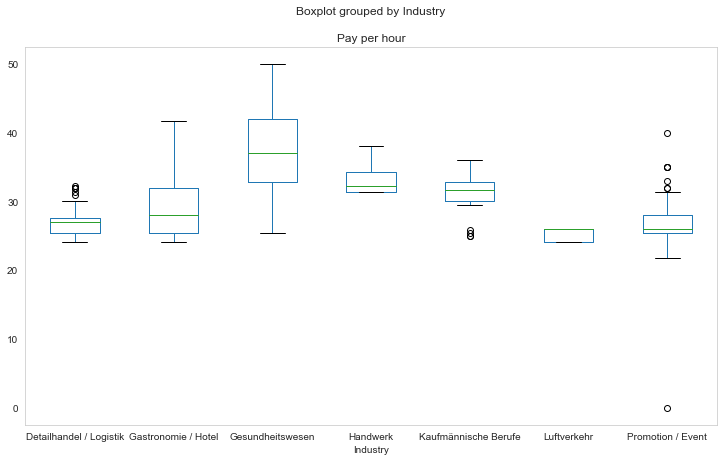

In [32]:
df.boxplot(by ='Industry', column =['Pay per hour'], grid = False, figsize = (12,7))

<AxesSubplot:title={'center':'Pay total'}, xlabel='Industry'>

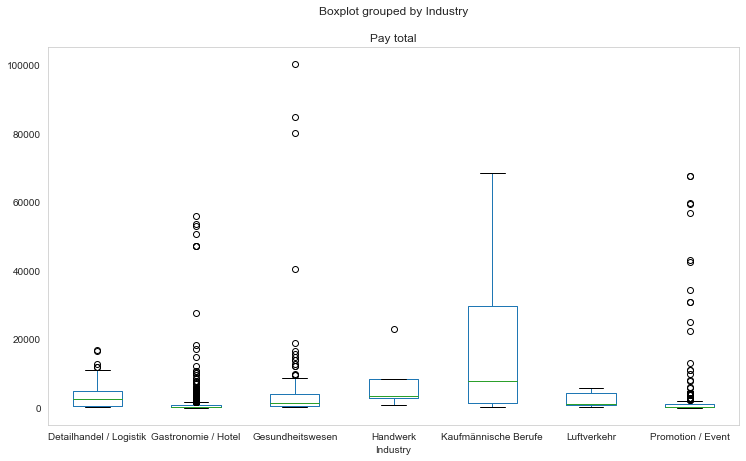

In [33]:
df.boxplot(by ='Industry', column =['Pay total'], grid = False, figsize = (12,7))

<AxesSubplot:xlabel='Pay per hour', ylabel='Industry'>

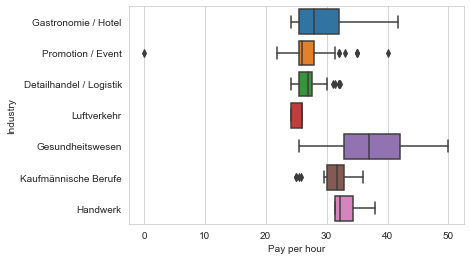

In [30]:
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(y = 'Industry', x = 'Pay per hour', data = df)

<AxesSubplot:xlabel='Pay total', ylabel='Industry'>

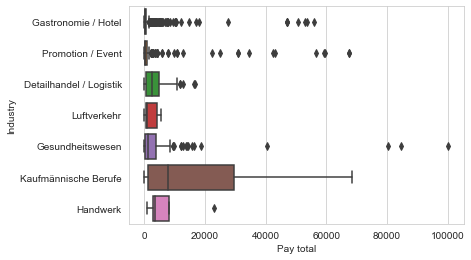

In [31]:
sns.boxplot(y = 'Industry', x = 'Pay total', data = df)